### Predicting Temperature

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

weather_df.head(10)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.289,5.944,0.830,14.104,269.000,15.826,0.000,1016.410,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.756,6.978,0.830,11.045,259.000,15.826,0.000,1016.510,Partly cloudy throughout the day.
5,2006-04-01 03:00:00+00:00,Partly Cloudy,rain,9.222,7.111,0.850,13.959,258.000,14.957,0.000,1016.660,Partly cloudy throughout the day.
6,2006-04-01 04:00:00+00:00,Partly Cloudy,rain,7.733,5.522,0.950,12.365,259.000,9.982,0.000,1016.720,Partly cloudy throughout the day.
7,2006-04-01 05:00:00+00:00,Partly Cloudy,rain,8.772,6.528,0.890,14.152,260.000,9.982,0.000,1016.840,Partly cloudy throughout the day.
8,2006-04-01 06:00:00+00:00,Partly Cloudy,rain,10.822,10.822,0.820,11.318,259.000,9.982,0.000,1017.370,Partly cloudy throughout the day.
9,2006-04-01 07:00:00+00:00,Partly Cloudy,rain,13.772,13.772,0.720,12.526,279.000,9.982,0.000,1017.220,Partly cloudy throughout the day.


### OLS Regression
Build a regression model where the target variable is *temperature*. As explanatory variables, use *humidity*, *windspeed*, *windbearing*, and *pressure*. Estimate the model using OLS.

In [57]:
# Reduce the amount of data used for the sake of plots
weather_df = weather_df.sample(5000, random_state=42)

y = weather_df['temperature']
X = weather_df[['humidity', 'windspeed', 'windbearing', 'pressure']]

lrm = linear_model.LinearRegression()
lrm.fit(X, y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.29999969e+01 -2.01442811e-01  3.33635956e-03 -2.15323979e-03]

Intercept: 
 39.80236130571349


In [55]:
import statsmodels.api as sm

X_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,X_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     976.5
Date:                Tue, 03 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:14:14   Log-Likelihood:                -16933.
No. Observations:                5000   AIC:                         3.388e+04
Df Residuals:                    4995   BIC:                         3.391e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          39.8024      1.064     37.425      0.000      37.717      41.887
humidity      -33.0000      0.529    -62.419      0.000     -34.036     -31.964
windspeed      -0.2014      0.015    -13.297      0.000      -0.231      -0.172
windbearing     0.0033      0.001      3.540      0.000       0.001       0.005
pressure       -0.0022      0.001     -2.301      0.021      -0.004      -0.000
==============================================================================
Omnibus:                      141.535   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.064
Skew:                          -0.424   Prob(JB):                     5.79e-34
Kurtosis:                       3.121   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking Assumptions of Linear Regression
Now, check if your model meets the Gauss-Markov Conditions below. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.

* linearity of models in their coefficients
* the error term should be zero on average
* homoscedasticity
* low multicollinearity
* error terms should be uncorrelated with one another
* features shouldn't be correlated with the errors
* normality of the errors

#### Assumption 1: Linearity in Coefficients

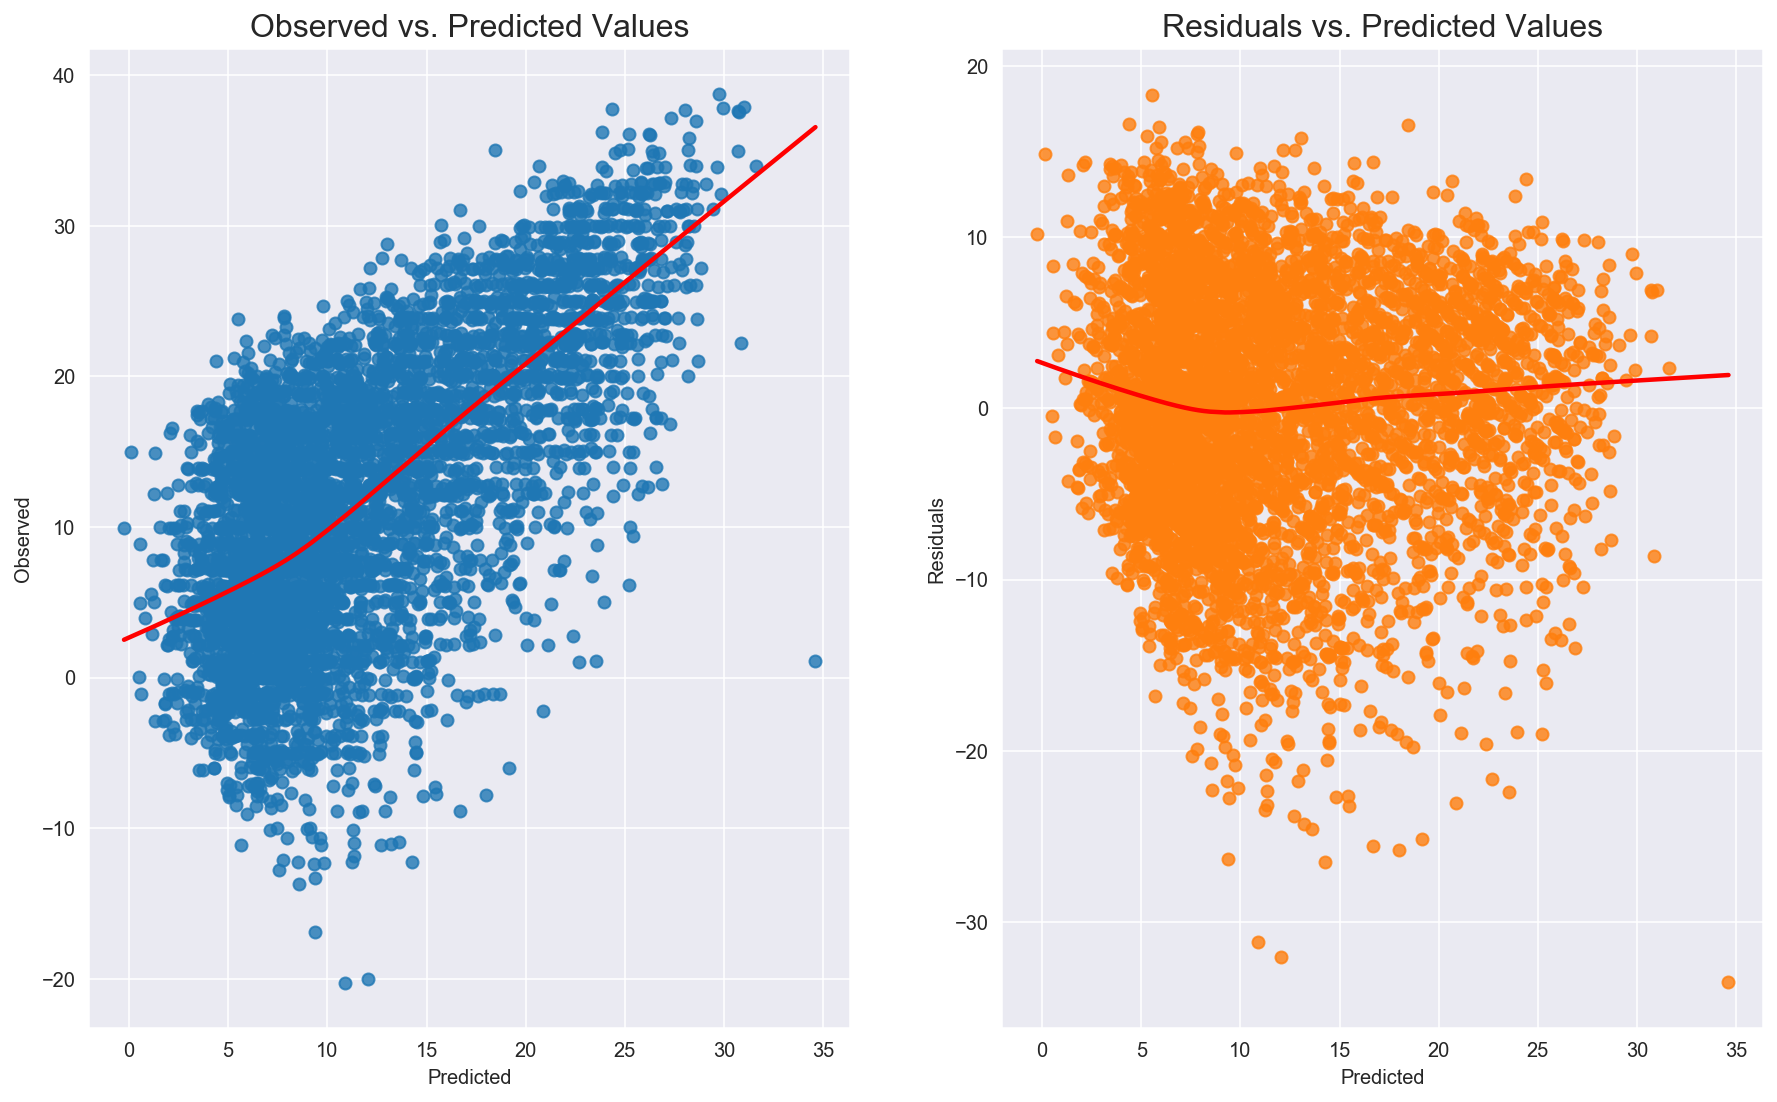

In [56]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(lin_reg, y)   

#### Assumption 2: Error Term should be Zero on Average

In [59]:
lin_reg.resid.mean()

-3.319208907726079e-12

It's close enough to zero.

#### Assumption 3: Homoscedasticity


 Breusch-Pagan test ----
                               value
Lagrange multiplier statistic 22.014
p-value                        0.000
f-value                        5.522
f p-value                      0.000

 Goldfeld-Quandt test ----
             value
F statistic  1.028
p-value      0.243

 Residuals plots ----


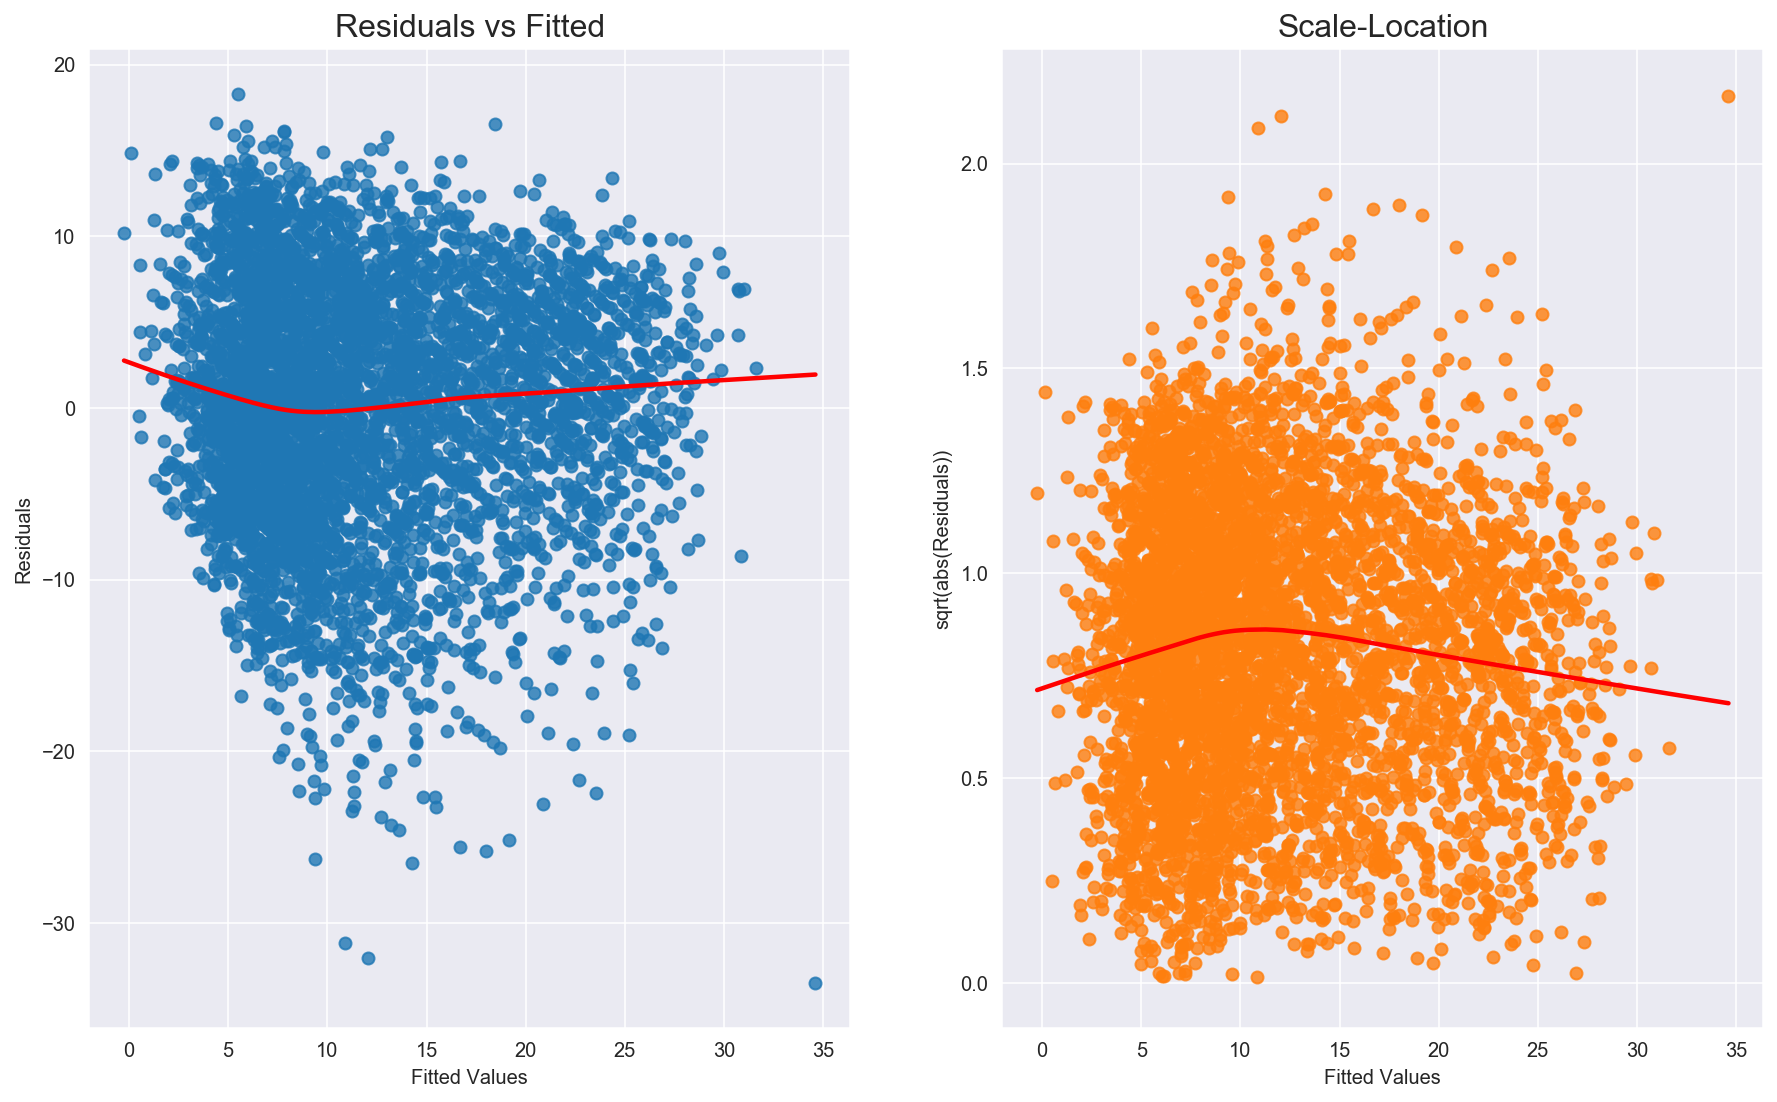

In [58]:
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(lin_reg)

#### Assumption 4: Low Multicollinearity

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_constant.values, i) for i in range(X_constant.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=X.columns).T

,humidity,windspeed,windbearing,pressure
vif,1.055,1.066,1.010,1.001


If no features are correlated, then all values for VIF will be 1, in which they are close to 1.

#### Assumption 5: Error terms should be uncorrelated with one another


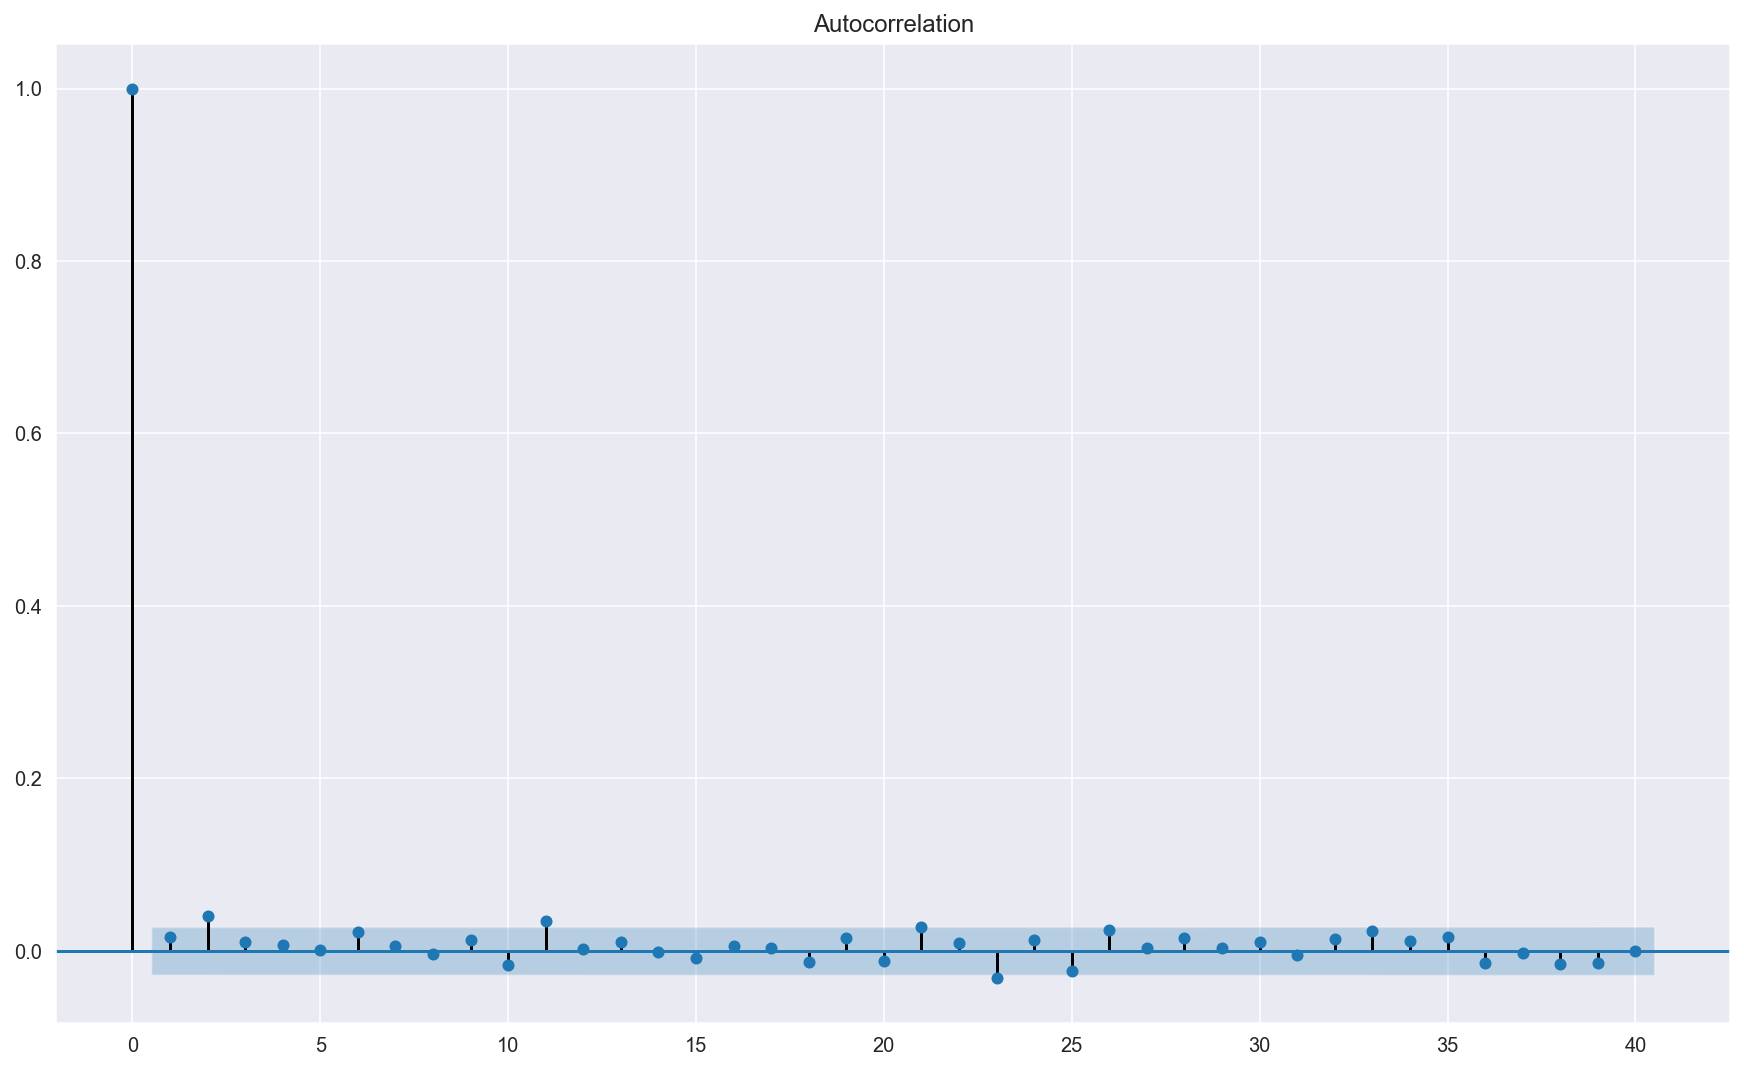

In [61]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(lin_reg.resid, lags=40 , alpha=0.05)
acf.show()

In [62]:
sms.stattools.durbin_watson(lin_reg.resid)

1.9687095812870112

Durbin-Watson Test
* value of 2 means that there is no autocorrelation in the sample
* values < 2 indicate positive autocorrelation, values > 2 negative one.

#### Assumption 6: Features uncorrelated with errors

In [63]:
from scipy.stats.stats import pearsonr

for column in X.columns:
    corr_test = pearsonr(X[column], lin_reg.resid)
    print(f'Variable: {column} --- correlation: {corr_test[0]:.4f}, p-value: {corr_test[1]:.4f}')

Variable: humidity --- correlation: 0.0071, p-value: 0.6169
Variable: windspeed --- correlation: -0.0044, p-value: 0.7554
Variable: windbearing --- correlation: 0.0083, p-value: 0.5567
Variable: pressure --- correlation: 0.0024, p-value: 0.8678


We cannot reject the null hypothesis here for any of our features and the errors, that is, we cannot say that there is a lack of correlation between our features and the errors

#### Other Assumptions that are Useful
We will check variance in each feature, and then we will also check normality of residuals with qq-plot.

In [64]:
X.apply(np.var, axis=0)

humidity          0.039
windspeed        47.563
windbearing   11646.849
pressure      11715.778
dtype: float64

Jarque-Bera test ---- statistic: 153.0643, p-value: 0.0
Shapiro-Wilk test ---- statistic: 0.9879, p-value: 0.0000
Kolmogorov-Smirnov test ---- statistic: 0.3895, p-value: 0.0000
Anderson-Darling test ---- statistic: 10.0157, 5% critical value: 0.7860
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


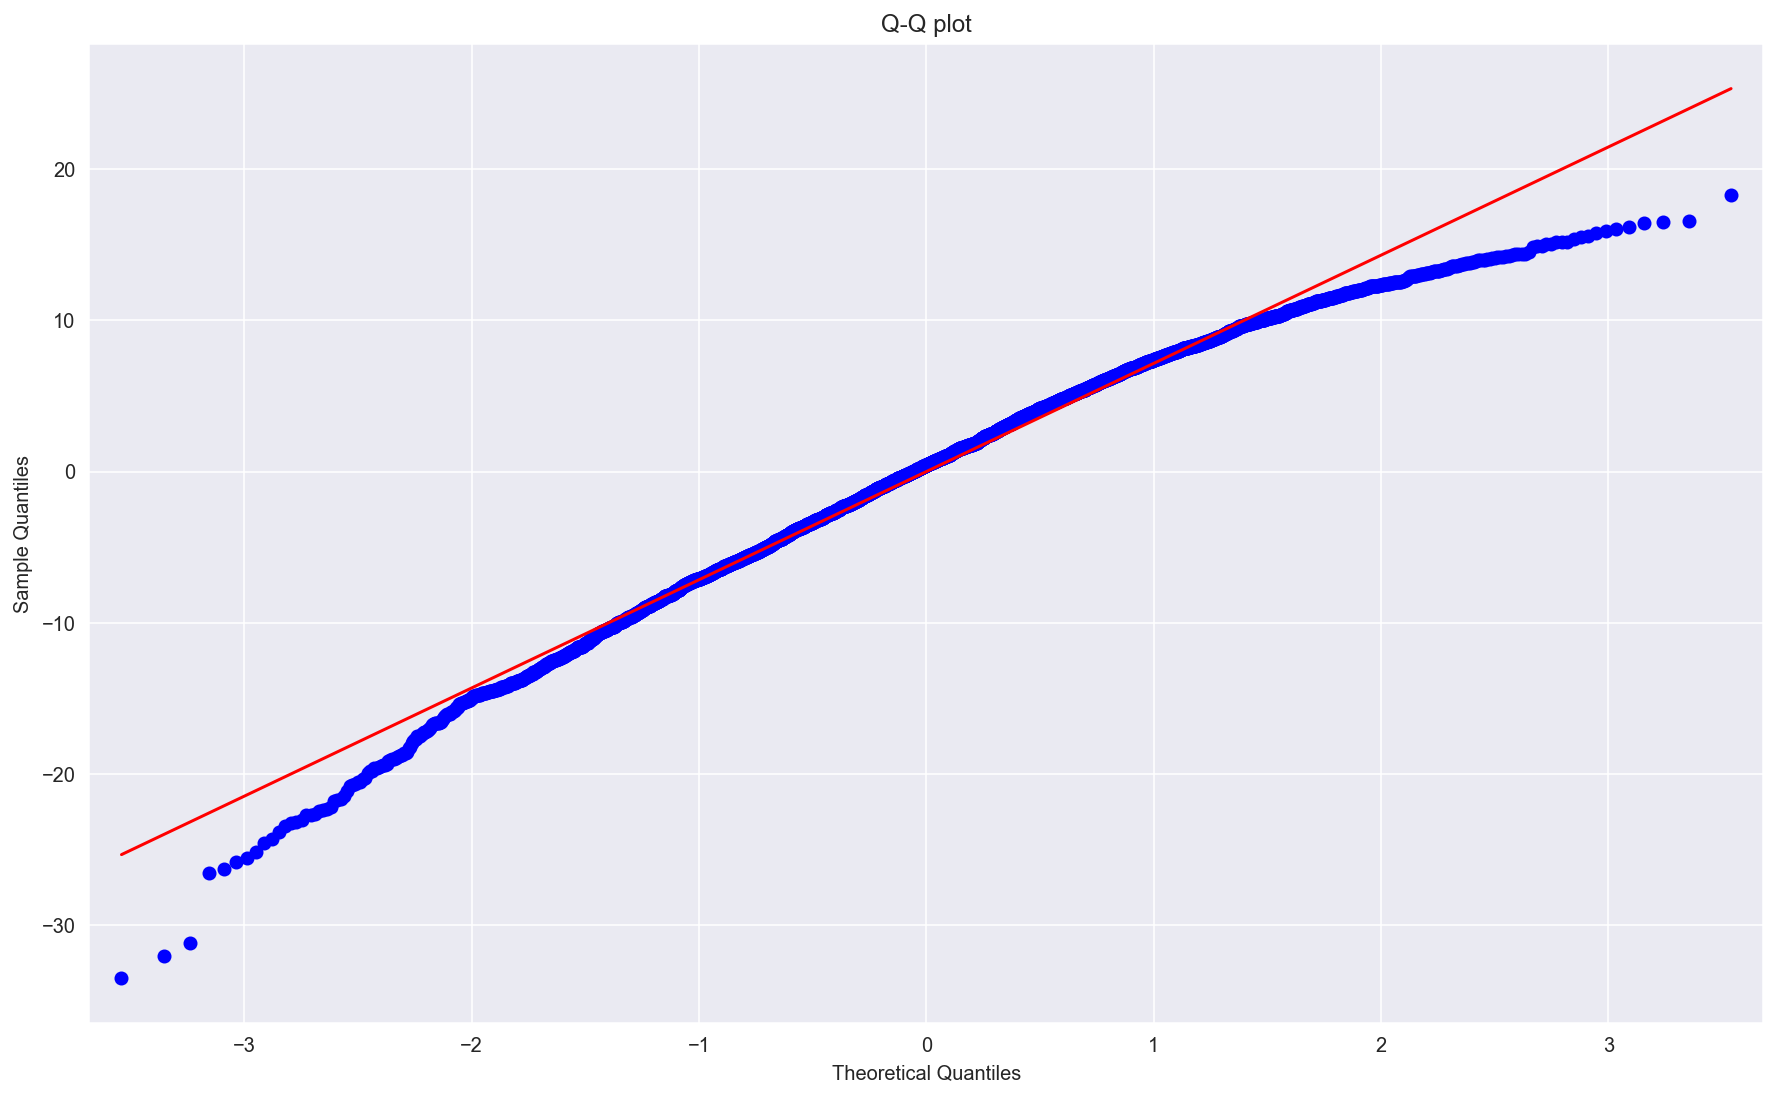

In [65]:
from scipy import stats

def normality_of_residuals_test(model):
    sm.ProbPlot(model.resid).qqplot(line='s');
    plt.title('Q-Q plot');

    jb = stats.jarque_bera(model.resid)
    sw = stats.shapiro(model.resid)
    ad = stats.anderson(model.resid, dist='norm')
    ks = stats.kstest(model.resid, 'norm')
    
    print(f'Jarque-Bera test ---- statistic: {jb[0]:.4f}, p-value: {jb[1]}')
    print(f'Shapiro-Wilk test ---- statistic: {sw[0]:.4f}, p-value: {sw[1]:.4f}')
    print(f'Kolmogorov-Smirnov test ---- statistic: {ks.statistic:.4f}, p-value: {ks.pvalue:.4f}')
    print(f'Anderson-Darling test ---- statistic: {ad.statistic:.4f}, 5% critical value: {ad.critical_values[2]:.4f}')
    print('If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. ')
    
normality_of_residuals_test(lin_reg)

Our residuals do not come from a normal distribution, although it is close.